University of Zagreb<br/>
Faculty of Electrical Engineering and Computing<br/>
Department of Electronic Systems and Information Processing

Academic year 2023/2024

**1st laboratory exercise**

*Digital Image Processing and Analysis* (183463)

Date: 2024-03-08

Please send any feedback (corrections, comments, suggestions etc.) regarding this document to franko.sikic@fer.hr.

© University of Zagreb Faculty of Electrical Engineering and Computing, 2021.

Permission is granted to make and distribute copies of this instructions provided the copyright notice and this permission notice are preserved on all copies.

# Introduction

Instructions for laboratory exercises for the course *Digital Image Processing and Analysis* are prepared in a form of a <a href="https://jupyter.org/">Jupyter</a> notebooks.

All problems in prepared notebook are intended to be completed in Python using <a href="https://colab.research.google.com">Google Colaboratory</a> platform (Colab for short).

## How to Submit Your Laboratory Report

Simply write-in your code to all empty code cells and write in your answers to the text cells with questions.

Empty code cells contain the placeholder text `# Write-in your solution` while text cells where you have to write-in someting contain a bold uppercase text **WRITE YOUR ANSWER HERE**.

Once you have completed all problems save this notebook locally in a file named DIPA_LAB_X_NAME_SURNAME.ipynb,
where X is the exercise number, and submit it via Moodle under the appropriate upload section.

Your submissions will be first automatically re-evaluated which corresponds to selecting the *Runtime/Restart and run all* command in Colab. Therefore, it is strongly suggested that you run this command yourself before submitting your notebook.

## Student Information

Before proceeding double click on this text and then fill in your name:

Name: **Dominik Barukčić**

Student ID number (JMBAG): **0036538320**

## Suggested Reading

### General Reading

If you are not familiar with Python then start with a Python tutorial such as e.g. an official one available at <a href="https://docs.python.org/3/tutorial/">https://docs.python.org/3/tutorial/</a>.

Jupyter notebooks are relying on <a href="https://ipython.org/">IPython</a>, which is an interactive Python interpreter. Jupyter notebooks may be run locally or they may be conveniently executed remotely in Google Colaboratory via web browser.

Readers familiar with Matlab who have only basic knowledge of Python are strongly encouraged to read the document <a href="https://numpy.org/doc/stable/user/numpy-for-matlab-users.html">NumPy for Matlab users</a> before attempting to solve this laboratory exercise in Colab.

### Image Processing in Python

Some general image processing functions are available as a part of [`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html). This basic functionality is extended by the [`scikit-image`](https://scikit-image.org/). We will also use [OpenCV](https://opencv.org/).

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Required Functions

To simplify the code in Python in this notebook we may deliberately import functions from <a href="https://www.scipy.org/">SciPy</a>, <a href="https://numpy.org/">NumPy</a> and <a href="https://matplotlib.org/">Matplotlib</a> directly into the global namespace so e.g. we can write `fft` instead of `scipy.fft.fft`.

Please keep in mind that such an approach may be tolerated for the purpose of a short laboratory exercise where risks of collisions and side effects are minimal. It is best always avoided in production code.

If you prefer to use namespaces then feel free to change the import statements to retain strict package separation, e.g. `import numpy as np`.

In [2]:
# Import packages
import cv2
import skimage.io

# To display images in browser
from google.colab.patches import cv2_imshow

# Import some functions to the global namespace for convenience
from scipy.ndimage import *
from scipy.fft import *
from scipy.signal import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import *
import PIL
from PIL import Image

## Image loading

We will be using images from the [USC-SIPI database](http://sipi.usc.edu/database/) and additional images available on the [DIPA class webpage](https://www.fer.unizg.hr/en/course/dipaa_b/laboratory#%23!p_rep_139398!_-187329). To load any of these images, all we have to do is copy the URL of the image (the download link) and write the following two lines of code.

In [3]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=5.3.02"
img = skimage.io.imread(url, plugin = 'pil')

<ipython-input-3-3e601afe4f29>:2: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  img = skimage.io.imread(url, plugin = 'pil')


# 1.0 Image representations

[Grayscale](https://en.wikipedia.org/wiki/Grayscale) images are composed exclusively of shades of gray. In a computer a 2D gray image is represented as an $M \times N$ matrix of pixel values, which merely represent light intensity.

It takes several such matrices for colored images - one for each channel. There are several color models used for colored image representation. For instance, an [RGB](https://en.wikipedia.org/wiki/RGB_color_model) image has 3 channels (for red, green and blue color) so an $M \times N \times 3$ matrix is used.   Colored images can be converted to grayscale images, usually by performing a weighted sum of the channels. The [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function is used to convert images from one color space to another.

These representations allow the use of common matrix operators for image processing and analysis.

Note that images can be stored either in [row-major order or column-major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order). Also note that some tools use BGR order of color channels instead of RGB (for more information see [endianness](https://en.wikipedia.org/wiki/Endianness)).

Numpy uses row-major and OpenCV uses BGR row-major order.


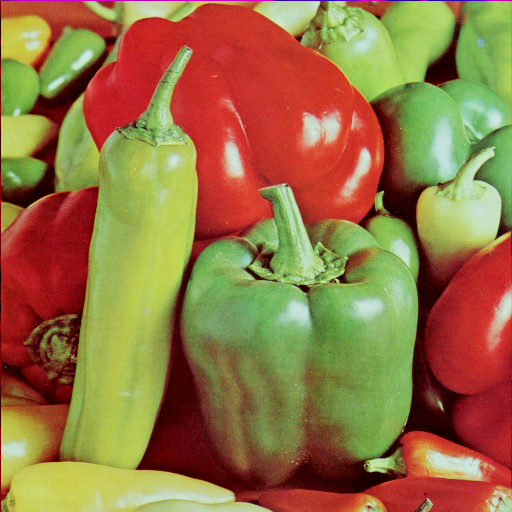

In [16]:
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.07"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # openCV uses BGR (blue, green, red) representation
cv2_imshow(img)

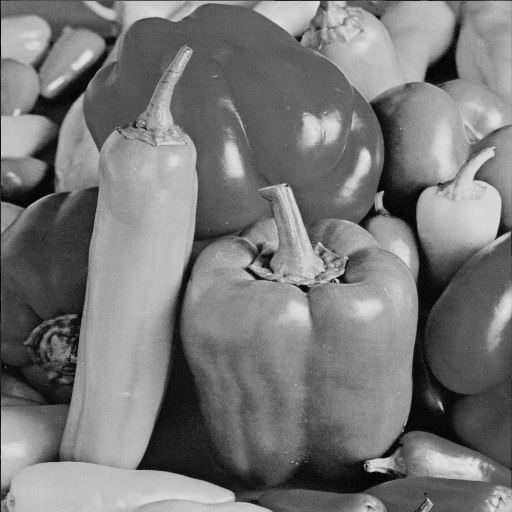

In [5]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

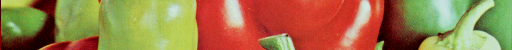

In [17]:
horizontal_section = img[150:200, :, :] #choosing only 50 rows of the matrix, which correspond to 50 horizontal lines of the image
cv2_imshow(horizontal_section)

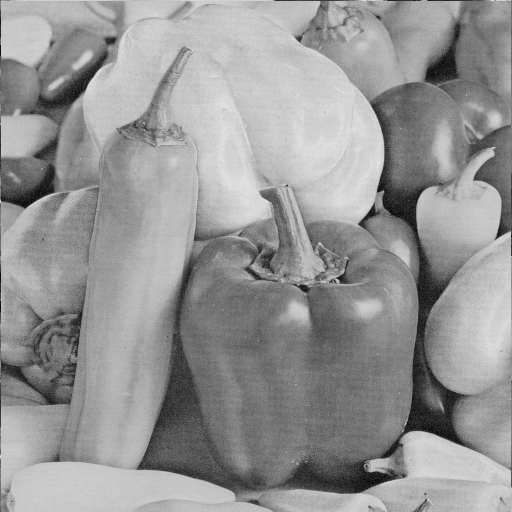

In [15]:
red_channel = img[:,:,2]
cv2_imshow(red_channel)

### **1.0.1 Problems**

1. Display a vertical section of the Mandrill (http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03) image from columns 300 to 450.

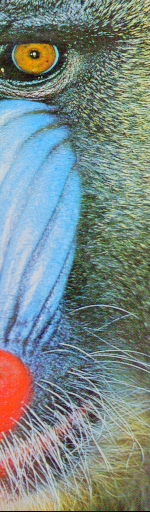

In [19]:
# Write-in your solution
url = "http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03"
img = skimage.io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# cv2_imshow(img)
vertical_section = img[:, 300:450, :]
cv2_imshow(vertical_section)

2. Display the blue channel of the same image. Explain why it isn't blue.

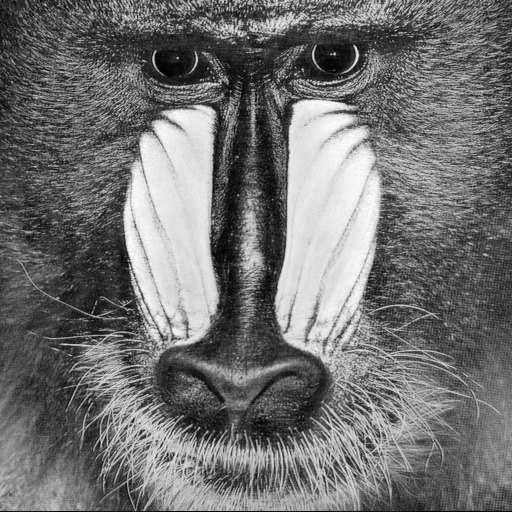

In [20]:
# Write-in your solution
red_channel = img[:,:,0] # B(0), G(1), R(2)
cv2_imshow(red_channel)

The result is grayscale rather than blue colored because an RGB image consists of 3 separate channels, red, green and blue. Each is representing the intensity of that color in every pixel indicating the strenght of colored component. Higer values(255) represent more the color, while lower values(0) are representing less color. When visualized with only one channel, it is shown as a grayscale image where brightness compares to intensity of blue where brighter/whiter is more like blue(255), and for the dark areas the blue is absent. That is because the display does not have color information but simply maps intensity levels.

# 1.1 Unary operations on the image

Unary operations on the image are mathematical operations whose input is a pixel intensity value, and the
output is a changed intensity value of the same pixel. The operation is performed for all of the pixels in
the image, meaning that a unary operator produces an image for each given input image. A scheme of a unary operation is given with Fig.1.1.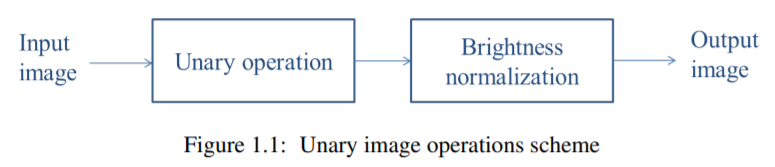

A unary operation can be any mathematical function that changes the intensity values of the pixels in an
image. Codomain of the function does not have to be equal to its domain. Therefore, if we want to obtain
a meaningful display of an image after performing an unary operation on it, the resulting image will need
to be rescaled. Images whose pixel values are floats should be scaled to the interval
[0,1], whereas the images whose pixel values are integers should be scaled to the interval
[0,255].

Matplotlib function [imshow()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html) does an automatic scaling to the required interval and displays it.
On the other hand, [cv2_imshow()](https://docs.opencv.org/master/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) doesn't do the scaling so we have to perform it on our own. For this we use [cv2.normalize()](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga87eef7ee3970f86906d69a92cbf064bd) and scale to [0, 255], regardless of the pixel value type.

## Example:

15.9687195 (600, 600)


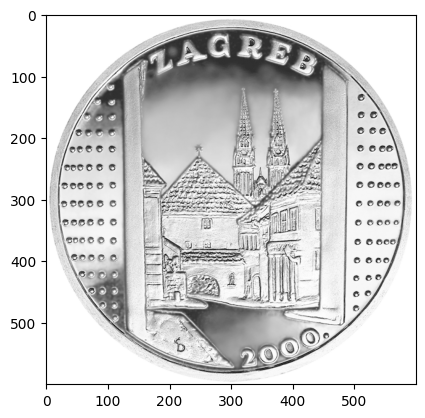

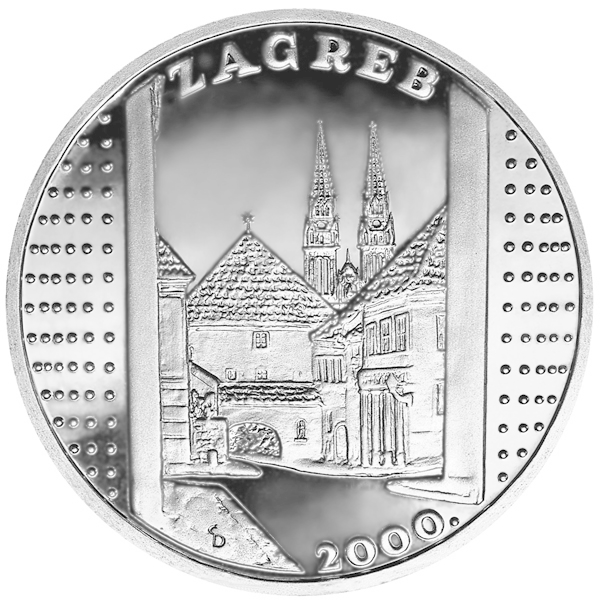

In [22]:
img = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.sqrt(img, dtype='float32')
print(np.amax(img), img.shape)

# Display image
plt.imshow(img, cmap='gray')
plt.show()

img = cv2.normalize(src=img, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2_imshow(img)

### **1.1.1 Problems**
1. How would you do scaling mathematically? (Write the mathematical expressions using [LaTeX](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/))


Mathematical expression for scaling to value in range of \( [0, 255] \) is:


$I' = 255 \cdot \frac{I - I_{\min}}{I_{\max} - I_{\min}}$

2. Read the image uskoci1.png. Create a grayscale image out of this image using the [cv2.cvtColor()](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) function like this:  
`gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)` . \
Perform the following unary operations on this image: logarithmic function, square and square root,
and compare what happened to the darker, and what happened to the lighter parts of the image.

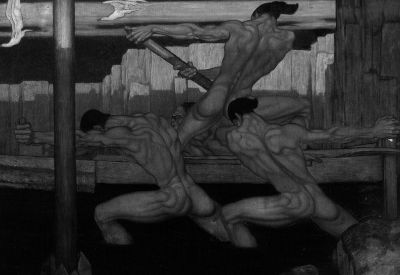

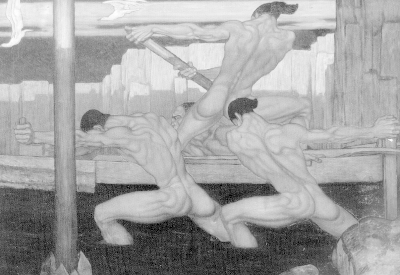

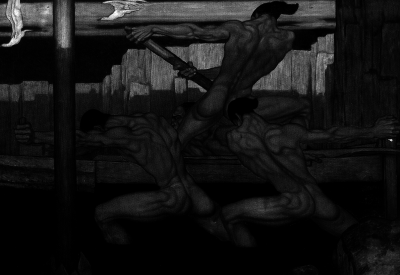

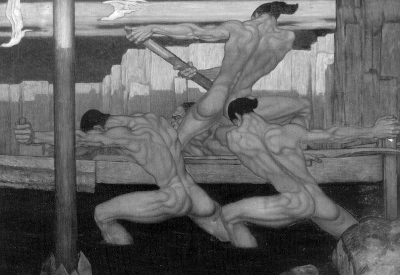

In [30]:
# Write-in your solution
img = cv2.imread("/content/drive/MyDrive/Images/uskoci1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

img_log = np.log(img, dtype='float32')
img_log = cv2.normalize(src=img_log, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2_imshow(img_log)

img_sqr = np.square(img, dtype='float32')
img_sqr = cv2.normalize(src=img_sqr, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2_imshow(img_sqr)

img_sqrt = np.sqrt(img, dtype='float32')
img_sqrt = cv2.normalize(src=img_sqrt, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
cv2_imshow(img_sqrt)


3. If we denote these unary operations with $U_x, x = 1,2,3$, and scaling of the brightness with $N$, write
an expression for the transfer function of the system given with the Fig.1.1. (Transfer function is a
composition of the functions: $H_x = N ◦U_x $.)


**WRITE YOUR ANSWER HERE**

4. Display the shape of the transfer function (i.e., calculate its value for each possible input pixel value) for each of the given unary operations.

In [ ]:
# Write-in your solution

# 1.2 Binary operations

Binary operations are the operations that take two input images to perform a mathematical operation. The
scheme of the binary operation is given in Fig. 1.2.
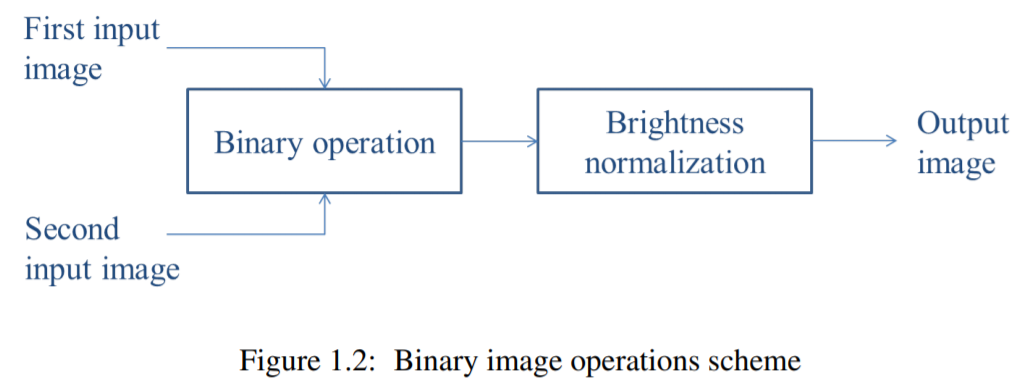



Binary options require the input images sizes to be equal. The options for this are following: To decrease
the size of the bigger image, to increase the size of the smaller image, or to change the size of both
images. Also, the colorspace of both images needs to be the same (RGB, [HSV](https://en.wikipedia.org/wiki/HSL_and_HSV) or other; or black and
white - grayscale, ie. both images need to be indexed and have the same color palette.

## Example:

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("/content/drive/MyDrive/Images/medalja_dubrovnik.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print(img1.shape, img2.shape)
img2 = cv2.resize(img2, img1.shape[:2], interpolation=cv2.INTER_LINEAR) #bilinear interpolation
print(img1.shape, img2.shape)

img = img1 + img2
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

### **1.2.1 Problems**
1. Pick two grayscale images with different sizes from the USC-SIPI image database. Try several binary
operations on them: summation, multiplication, and subtraction. Display the results and explain them.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

2. Try the same binary operations using color (RGB) images. Display the results. Explain what happened.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWER HERE**

###  **1.2.2 Digital angiography**
The most common binary operation in the practice is the subtraction of the images. It is often used to detect or enhance a difference between two images. One such example is [digital subtraction angiography (DSA)](https://en.wikipedia.org/wiki/Digital_subtraction_angiography), which is a frequently used medical imaging technique. In this type of applications, one of the images usually contains a scene (the background), while the other image contains the same scene including objects (e.g. blood vessels), which we want to enhance, positioned in front of the same background. Assuming that the background is the same in both images, subtraction of the images results in a new image with the objects of interest being enhanced.


###  **1.2.3 Problems**
1. Read the images angio0.tiff and angio1.tiff. These images contain a head scan before and after the
contrast injection. Subtract these two images and display the result. What did you obtain in the
resulting image?


In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**


## **1.2.4 Linear convolution**
Linear convolution is a mathematical operation used to compute the output of a linear spatially invariant (LSI) system for a given input. The LSI system is characterised by its impulse response function, which is often called a mask. Two-dimensional (2-D) LSI systems used in practical image processing applications usually have impulse response functions, which have relatively small regions of support such as 3x3, 5x5, or 7x7. LSI systems having an impulse response function with a finite region of support are also called FIR (finite impulse response) systems. The practical reason for using impulse response functions with such small regions of support is to limit the number of operations needed to calculate the linear convolution. However, even by using such simple FIR filters it is possible to perform a range of useful image processing operations including noise smoothing and edge detection. Two examples of the convolution operation are given further in the text.

Convolution of an image and a mask is performed by calling the function [cv2.filter2D](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). This function preserves the dimensions of the image.

## Example:

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/Images/medalja_kamenita_vrata.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
mask = np.array(
       [[1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]]) / 4
mask = cv2.flip(mask, flipCode=-1)  #flipCode < 0 --> both horizontal and vertical flipping
print(mask)

img = cv2.filter2D(img, ddepth=-1, kernel=mask)

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')

## Example:

The [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) function allows calculating convolution with several output size options.

In [ ]:
img2 = cv2.imread("/content/drive/MyDrive/Images/medalja_dubrovnik.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask = np.array(
       [[1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]]) / 3

img3 = convolve2d(img2, mask)  # calculate the ’full’ convolution
img4 = convolve2d(img2, mask, mode='same') # calculate only the central part of the convolution so that the output image has the same dimensions as the input image
img5 = convolve2d(img2, mask, mode='valid') # calculate only the ’correct’ central part of the convolution
print(img3.shape, img4.shape, img5.shape)

plt.figure(figsize=(8,8))
plt.imshow(img3,cmap='gray')

It is noticeable that, since we don’t have information on the pixel intensity values out of the image
(surrounding the image) necessary for calculating the linear convolution, this approach introduces errors
near the borders of the image. Therefore, only the middle part of the result, with the dimensions (Mx −
Mh +1)×(Nx −Nh +1), is a fully reliable convolution result.


###  **1.2.5 Problems**
1. Select several images and calculate the linear convolution (whichever *mode*) with the following masks: \\
$\frac{1}{4} \begin{bmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{bmatrix}$ ,
$\frac{1}{3} \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & −1 \end{bmatrix}$ ,
$\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & −1 \end{bmatrix}$ ,
$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 4 & −1 \\  0 & -1 & 0 \end{bmatrix}$

Display the results and comment them.


In [ ]:
# Write-in your solution

**WRITE YOUR ANSWER HERE**


2. Define the mask (with the dimensions 4 × 4) for averaging the images and apply it to one of the
selected images from Problem 1. using the linear convolution.
Which mask did you choose?


In [ ]:
# Write-in your solution

**WRITE YOUR ANSWER HERE**


3. Did the chosen mask require the normalization of the image brightness? Why?

**WRITE YOUR ANSWER HERE**


4. Is the convolution a unary or a binary image operation?

**WRITE YOUR ANSWER HERE**


# 2.1 Quantization

Mathematically, quantization can be defined as mapping of the signal’s codomain from the space $\mathbb{R}$ (space
of real numbers) to the space $\mathbb{N}$ (space of natural numbers).

Quantization is a process where a signal transforms in a way that its values are rounded to a determined
(discrete) values (quantization levels). The difference between two neighboring quantization levels is a
quantization step or a quant. The basic idea of quantization is illustrated in the Fig 2.1.

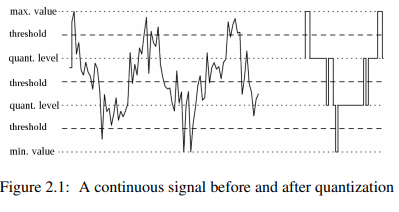

The relation of the quant and the number of bits needed for the quantization is given with $q = \frac{A}{2^B - 1}$, where q denotes the quant, B the number of bits, and A the (peak-to-peak) span of the signal values.

### **2.1.1 Problems**

1. What does the PIL function [Image.quantize()](https://pillow.readthedocs.io/en/stable/reference/Image.html?highlight=quantize#PIL.Image.Image.quantize) do? How can we use this function to uniformly quantize an image with N quantization levels?

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

2. Write a function for quantizying an image img, so that the whole dynamical range of the pixel values in the given images is uniformly quantized into N levels. Let N and img be the input parameters of the function. This function will be used in some later problems in this exercise.

In [ ]:
# Write-in your solution

3. Read and display the images salona.png and knjiga_ssa.png before and after their quantization with different numbers of bits (1 to 8).

In [ ]:
# Write-in your solution

4. At what number of bits do you notice the difference in image quality?

**WRITE YOUR ANSWERS HERE**

5. What is obtained by quantizying the image with 1 bit?

**WRITE YOUR ANSWERS HERE**

6. What is the quantization noise? What is the maximum possible value of the quantization noise for the previous examples?

**WRITE YOUR ANSWERS HERE**

# 2.2 Sampling

Mathematically, sampling can be defined as mapping of the signal’s domain from the space $\mathbb{R}$ to the space
$\mathbb{N}$.

Sampling of the signal is a process of creating a discrete signal from the continuous one, in a way
that the values (samples) are taken only in the certain places (or with certain time steps) from the original
continuous signal. If the samples are taken with a same spacing (i.e. sampling rate) throughout the whole
signal, the sampling is called homogeneous.

Sampling of an image is illustrated with the Fig 2.1.
By choosing the sampling rate (the distance between
the samples that we want to take) in vertical and horizontal direction, we define the amount of information
that will be preserved.

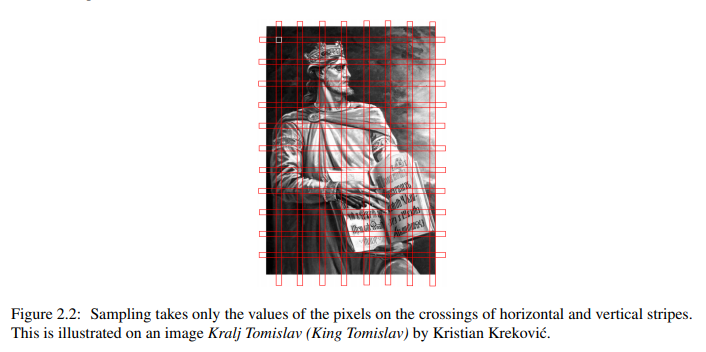

Since the digital computers are not able to store continuous signals, we work with dense sampled signals
instead. In these exercises, these dense sampled signals will be sampled with a smaller frequency (sample
rate) to demonstrate the effects of sampling. This process is called subsampling because it denotes taking a
subset from the existing samples. If we want to subsample an image, we simply take every N-th pixel.

## Example:

In [ ]:
klis2 = cv2.imread("/content/drive/MyDrive/Images/klis2.png")
klis2 = cv2.cvtColor(klis2, cv2.COLOR_BGR2GRAY)

N = 10
klisM = klis2[::N, ::N]

plt.figure(figsize=(8,8))
plt.imshow(klisM, cmap='gray')

### **2.2.1 Problems**

1. Read and subsample the image asinh1.tiff with factors (steps) of 1 to 10. Display and comment on the results. What happened? Explain why.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

# 2.3 Pixelization

This part of the laboratory exercise demonstrates a so-called ”chessboard effect” caused by resolution reduction.

This effect can be used for hiding the person’s identity or censuring certain information in an
image, and is called pixelization. Schematical display of a pixelization procedure is given in the Fig 2.3.

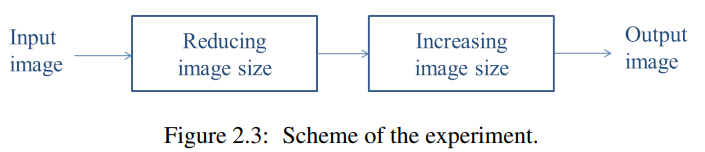

Decreasing the image size for a certain factor and increasing it for the same factor (by repeating the
existing values) has an effect of decreasing the image resolution.

Resizing the image can be done by calling the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d).

## Example:

In [ ]:
def pixelize(img, N):
    img2 = cv2.resize(img,
                      (int(img.shape[0] / N), int(img.shape[1] / N)),
                      interpolation = cv2.INTER_NEAREST)

    img3 = cv2.resize(img2,
                      (img2.shape[0] * N, img2.shape[1] * N),
                      interpolation = cv2.INTER_NEAREST)

    return img3

In [ ]:
klisP = pixelize(klis2, 5)

plt.figure(figsize=(8,8))
plt.imshow(klisP, cmap='gray')

If we want to censure only a certain part of an image, which occupies a square area of 60×25 pixels, starting with a coordinate (20,32) we can just take a subarray of the image and pixelate it separately.

## Example:

In [ ]:
selected_area = klis2[20:20+60, 32:32+25]
klisP = pixelize(selected_area, 5)

plt.figure(figsize=(8,8))
plt.imshow(klisP, cmap='gray')

### **2.3.1 Problems**

1. Pick an object in the images salona.png and knjiga_ssa.png that you would like to censure. Use the previously described procedure in such a way that your resulting image displays the whole image, but with a selected object replaced with its pixelized version.

In [ ]:
# Write-in your solution

2. In the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), what is the meaning of the input parameter INTER_NEAREST?



**WRITE YOUR ANSWERS HERE**

# 2.4 Alias effect

According to [Shannon’s sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem/), the sampling frequency has to be twice as large as the maximum
frequency occuring in the signal, so that the signal could be correctly reconstructed. If the sampling frequency is not big enough, two signals of different frequencies can no longer be distinguished - they are
each other’s aliases.

This consequence is called aliasing or spectrum-overlap. This effect is illustrated in
the Fig 2.4. The figure shows the frequency domain of an image (its spectrum) as a single blue circle, and overlapping of the certain parts of the spectrum due to the to small sample rate. The scheme of the experiment
resulting in alias effect is given in the Fig 2.5.

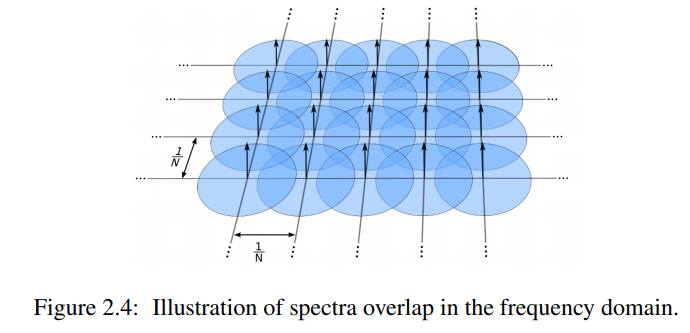

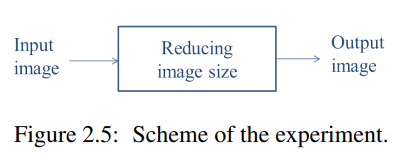

Overlapping of the spectra causes the interference of the two alias signals, resulting in a phenomenon called [Moiré’s effect](https://en.wikipedia.org/wiki/Moir%C3%A9_pattern). This phenomenon will be explained later.

If we want to reduce the image resolution and avoid overlapping of the spectra and the signal interference, high frequencies that occur in the signal (image) need to be cut-off before subsampling. The reason
for this is that the highest frequencies are the ones that could overlap. This can be obtained by filtering
the image before subsampling with a low-pass filter. The simplest version of low-pass filtering in a spatial
domain is spatial averaging of the image.

## Example:

In [ ]:
h = np.ones((3, 3)) / 9.0 #create an averaging filter with size 3x3
imgL = cv2.filter2D(klis2, -1, h) # apply the filter

plt.figure(figsize=(8,8))
plt.imshow(imgL, cmap='gray')

We can notice that with spatial filtering we lose certain information from the image as well. However, a (larger) loss of the information would occur by subsampling of the image. By prior averaging of the
image, we have blurred the pixel values so that the certain amount of information belonging to one pixel is
transfered to the pixel in the middle of the defined averaging filter. Therefore, this procedure can be seen
as storing as much as information as it is possible into a smaller number of pixels. Unfortunately, this is an
irreversible procedure.

### **2.4.1 Problems**

1. Read, blur and subsample the image asinh1.tiff with factors of 1 to 10. Compare the results with the ones obtained in previous (no blur) subsampling.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

2. Read and subsample images testpat1.tif and testpat2.tif with a factor of 4. What happened to the high frequencies, and what happened to the low frequencies in these images?

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

3. Repeat the experiment but with blurring the image before subsampling. Compare the results.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

4. How do the results depend on the size of the averaging filter?

**WRITE YOUR ANSWERS HERE**

5. Read and subsample the image uzorak.tif it by a factor of 3, but only in the x-axis direction.

In [ ]:
# Write-in your solution

6. Read and subsample the image uzorak.tif by a factor of 2, but only in the y-axis direction.

In [ ]:
# Write-in your solution

7. What happened in the first case and what happened in the second case? Why?

**WRITE YOUR ANSWERS HERE**

8. Read and reduce the sizes of the images testpat1.tif and testpat2.tif 4 times using the function [cv2.resize()](https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d). Are these results different than the ones obtained before with the same images? Why?

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

9. Can we use this function to avoid pre-filtering of the image? Why?

**WRITE YOUR ANSWERS HERE**

10. Read the image klis2.png and demonstrate the alias-effect on it.

In [ ]:
# Write-in your solution

# 2.5 Moiré effect

Moiré effect was discovered way before the digital computers area, as a phenomenon that occurs when
different patterns (of for example cloth) overlap. Moiré effect is basically a consequence of interference of
different patterns (or waves). If we consider a signal as a wave, we can conclude that Moiré effect appears
when the spectra overlap and the alias of a signal appears.

### **2.5.1 Problems**

1. Read and subsample the image AB2.tiff with a factor of 39 in the y-axis direction. Display the original and the subsampled version of the image and comment on the results.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

2. What happens if you perform subsampling in the y-axis direction with some other factor? Read and subsample the image AB2.tiff with factors of 37, 40 and an arbitrarily chosen one.

In [ ]:
# Write-in your solution

3. Read and subsample the image hsokol.png or rolete.png with a factor of 5. Display the original and the subsampled version of the image and comment on the results.

In [ ]:
# Write-in your solution

**WRITE YOUR ANSWERS HERE**

Moiré effect can also appear during the scanning of the images. Due to the overlapping of the frequency
spectra, aliases and interference patterns appear. Since we can not demonstrate scanning, again we will
simulate it by subsampling of the images of great resolutions.

### **2.5.2 Problems**

1. Images testpat_circ.tif and asinh2.tiff were scanned with a 300 dpi (dots per inch) resolution. Read them and simulate what would have happened if they were scanned with a smaller resolution (200, 100 or 50 dpi).

In [ ]:
# Write-in your solution